<a href="https://colab.research.google.com/github/khalidpark/whitepaper-DeepLearning/blob/main/deep_learning_whitepapaer_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# sampling from: 'https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products'
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19_sample.csv')

In [2]:
df.shape

(10483, 25)

In [3]:
df.head(3)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,Amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...
2,2410,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-04-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Great price and great batteries! I will keep o...,Five Stars,ByDena,"https://www.barcodable.com/upc/841710106442,ht..."


아마존 브랜드가 보이네요, 이상한 점을 찾아 보세요

In [4]:
df['brand'].value_counts()

Amazon          5977
Amazonbasics    4499
AmazonBasics       7
Name: brand, dtype: int64

대소문자를 일치시켜 보겠습니다. 카테고리가 줄겠지요?

In [5]:
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          5977
amazonbasics    4506
Name: brand, dtype: int64

##### 알파벳/숫자만 남겨 봅시다.

이번에는 알파벳과 숫자만 남기기 원합니다. 문장 부호나 공백문자, 다른 기호들은 대부분 노이즈라고 볼 수 있습니다 (항상 그런 것은 아닙니다). 이번에는 `re` (regular expressions, 정규식) 패키지를 사용해서 정제를 해 보겠습니다.

사용할 정규식 표현은 `'[^a-zA-Z0-9 ]'` 입니다. 이 표현은 소문자(a-z), 대문자(A-Z), 숫자(0-9), 공백문자(space)를 제외한 모든 문자를 제거합니다.

In [6]:
# 정규식 라이브러리
import re

# 정규식
# []: [] 사이 문자를 매치, ^: not
regex = r"[^a-zA-Z0-9 ]"

# 정규식을 적용할 스트링
test_str = ("(Natural Language Processing) is easy!, DS!\n")

# 치환할 문자
subst = ""

result = re.sub(regex, subst, test_str)

In [7]:
result

'Natural Language Processing is easy DS'

정규식 정의에서 치환까지 수행하는 tokenize 함수를 만들어 보세요.

In [8]:
def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    tokens = re.sub(regex, subst, text)

    # 소문자로 치환
    tokens = tokens.lower().split()
    
    return tokens

In [9]:
tokenize(test_str)

['natural', 'language', 'processing', 'is', 'easy', 'ds']



---



아마존 제품에 리뷰 데이터 다루어 보겠습니다.
Alexa, Echo와 같은 아마존 제품에 대한 리뷰를 토큰화 하고 분석해보겠습니다!
- [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [10]:
!pip install squarify

In [11]:
from collections import Counter
import re
import pandas as pd

# squarify treemap
import squarify

import matplotlib.pyplot as plt
import seaborn as sns

# # spacy: NLP library
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# # Load general-purpose pretrained models to predict named entities, part-of-speech tags and syntactic dependencies
# ## https://spacy.io/models
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [12]:
nlp = spacy.load("en_core_web_lg")

In [13]:
df.head(2).T

,0,1
Unnamed: 0,25971,19398
id,AVqkIhxunnc1JgDc3kg_,AVwjfXqqQMlgsOJE8qmm
dateAdded,2017-03-06T14:59:43Z,2017-05-20T01:34:04Z
dateUpdated,2019-02-23T02:49:38Z,2019-02-25T02:23:15Z
name,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","All-New Fire HD 8 Kids Edition Tablet, 8 HD Di..."
asins,B018T075DC,B01J94SCAM
brand,amazon,amazon
categories,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","Fire Tablets,Tablets,Amazon Tablets,Computers ..."
primaryCategories,Electronics,Electronics
imageURLs,https://www.upccodesearch.com/images/barcode/0...,https://www.barcodable.com/images/barcode/0841...


reviews.text 문장의 단어를 카운트 해서 사용해 보겠습니다.

In [14]:
df['reviews.text'].value_counts(normalize=True)[:10]

good           0.002576
Good           0.001717
great          0.001717
Great          0.001431
ok             0.001431
Great price    0.001431
Great value    0.001240
Excellent      0.001049
great price    0.000859
good price     0.000859
Name: reviews.text, dtype: float64

각 리뷰텍스트를 토크나이즈 하여 tokens 칼럼으로 만듭니다.

In [15]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [16]:
df['tokens'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokens, dtype: object

In [17]:
df[['reviews.text', 'tokens']][:10]

,reviews.text,tokens
0,Though I have got it for cheap price during bl...,"[though, i, have, got, it, for, cheap, price, ..."
1,"I purchased the 7"" for my son when he was 1.5 ...","[i, purchased, the, 7, for, my, son, when, he,..."
2,Great price and great batteries! I will keep o...,"[great, price, and, great, batteries, i, will,..."
3,Great tablet for kids my boys love their table...,"[great, tablet, for, kids, my, boys, love, the..."
4,They lasted really little.. (some of them) I u...,"[they, lasted, really, little, some, of, them,..."
5,"I purchased 2 others for my 5 & 6yr-olds, and ...","[i, purchased, 2, others, for, my, 5, 6yrolds,..."
6,We purchased Amazon Fire kids edition tablet t...,"[we, purchased, amazon, fire, kids, edition, t..."
7,Got this when they were on sale last year and ...,"[got, this, when, they, were, on, sale, last, ..."
8,Lotta batteries. at a good price.,"[lotta, batteries, at, a, good, price]"
9,Best deal and work as expected,"[best, deal, and, work, as, expected]"


어떤 카테고리가 있는지 살펴보겠습니다

In [18]:
df['primaryCategories'].value_counts()

Electronics                    5184
Health & Beauty                4462
Toys & Games,Electronics        616
Office Supplies,Electronics     146
Electronics,Media                70
Animals & Pet Supplies            3
Electronics,Furniture             1
Office Supplies                   1
Name: primaryCategories, dtype: int64

Electronics 카테고리에 해당하는 문장들만 제한해서 분석해보겠습니다.

In [19]:

df = df[df['primaryCategories'] == 'Electronics']

In [20]:
df.head(2)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...,"[though, i, have, got, it, for, cheap, price, ..."
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...,"[i, purchased, the, 7, for, my, son, when, he,..."




---



#### 토큰을 분석해 봅시다.

Counter를 사용하여 모든 리뷰 토큰을 카운트 해보겠습니다.

In [21]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('the', 6562),
 ('and', 5183),
 ('it', 4786),
 ('to', 4685),
 ('for', 4496),
 ('i', 4378),
 ('a', 3861),
 ('is', 3036),
 ('my', 2942),
 ('this', 2924)]

the, and, a, is... 같은 어떤 문서에든지 많이 나타나는 단어들은 사실 큰 의미를 찾기 어려운 단어들 입니다.

이런 단어들을 **stopword(불용어)** 라고 합니다.

이와같은 프로세스를 사용해서 코퍼스의 전체 워드 카운트, 랭크 등 정보가 담긴 데이터프레임을 리턴하는 함수를 만들어 봅시다. 이 함수는 토큰화된 문서들이 들어있는 코퍼스를 입력으로 받습니다.

In [22]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [23]:
wc = word_count(df['tokens'])

In [24]:
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
68,the,2951,6562,1.0,0.041588,0.041588,0.569252
16,and,3162,5183,2.0,0.032848,0.074436,0.609954
24,it,2719,4786,3.0,0.030332,0.104768,0.524498
101,to,2647,4685,4.0,0.029692,0.134461,0.510610
2,for,2952,4496,5.0,0.028494,0.162955,0.569444


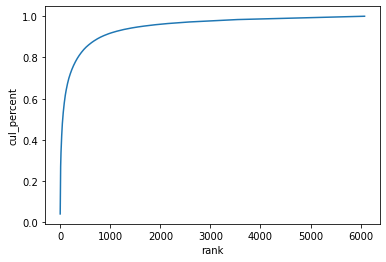

In [25]:
    import seaborn as sns

    # 누적분포그래프(CDF)
    sns.lineplot(x='rank', y='cul_percent', data=wc);

In [26]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.917869772983658

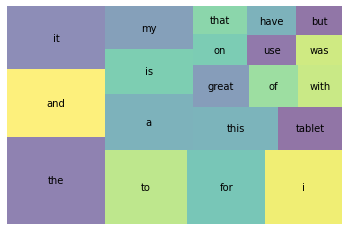

In [27]:
import squarify
import matplotlib.pyplot as plt

color=['viridis']

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()



---



### 기본 불용어

Spacy 모델에서 가져올 수 있는 기본 불용어를 확인해 보겠습니다.

In [28]:
print(nlp.Defaults.stop_words)

{"'ll", "'s", '‘d', 'no', 'now', '’m', 'their', 'thereafter', 'else', 'most', 'and', 're', 'less', 'four', 'himself', '‘m', "'d", 'under', 'ours', 'mine', 'was', 'neither', 'though', 'us', 'back', 'nevertheless', 'below', 'together', 'does', 'she', 'except', 'yet', 'without', 'if', '’s', 'never', 'whom', 'front', 'that', 'been', 'have', 'afterwards', 'six', 'go', "n't", 'both', 'otherwise', 'whereafter', 'itself', 'besides', 'elsewhere', 'above', 'due', 'those', 'toward', 'indeed', 'much', 'moreover', 'by', 'one', "'m", 'for', 'from', 'mostly', 'nor', 'than', 'whatever', 'not', 'during', 'so', 'amongst', 'is', 'move', 'seeming', 'had', 'other', 'why', 'quite', 'everywhere', 'into', 'are', '‘ve', 'noone', 'latterly', 'thence', 'everything', 'former', 'very', 'five', 'eleven', 'own', 'but', 'must', 'how', 'about', 'ca', 'at', 'someone', 'nothing', 'since', 'somehow', 'already', 'sixty', 'after', 'more', 'always', 'in', 'various', 'onto', 'last', 'among', 'within', 'should', 'however', 'a

In [32]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [33]:
tokens = []
# 토큰에서 불용어 제거, 소문자화 하여 업데이트
for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = []

    # A doc is a sequence of Token(<class 'spacy.tokens.doc.Doc'>)
    for token in doc:
        # 토큰이 불용어와 구두점이 아니면 저장
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [34]:
df.tokens.head()

0    [got, cheap, price, black, friday,, fire, grea...
1    [purchased, 7", son, 1.5, years, old,, broke, ...
3         [great, tablet, kids, boys, love, tablets!!]
6    [purchased, amazon, fire, kids, edition, table...
7    [got, sale, year, love, it!i, use, primarily, ...
Name: tokens, dtype: object

불용어들이 모두 제거가 되어 완전히 다른 단어들이 상위에서 보입니다.

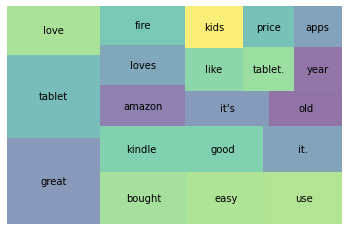

In [35]:
wc = word_count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 불용어 확장

중요하지 않지만 상위에 나오는 몇몇 단어들을 불용어에 추가해 보겠습니다.

In [36]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [37]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this'])

In [38]:
print(STOP_WORDS)

{"'ll", 'beyond', 'another', "'s", '‘d', 'no', 'now', '’m', 'throughout', 'their', 'thereafter', 'else', 'several', 'most', 'and', 're', 'less', 'may', 'four', 'himself', 'them', 'rather', 'three', '‘m', 'doing', "'d", '’d', 'under', 'ours', 'every', 'mine', 'was', 'neither', 'cannot', 'batteries', 'herein', 'take', 'around', 'becomes', 'me', '‘ll', 'though', 'wherein', 'twelve', 'seemed', 'alone', 'whether', 'us', 'bottom', 'I', 'well', 'back', 'nevertheless', 'beforehand', 'below', 'together', 'because', 'does', 'did', 'she', 'put', 'except', 'do', 'beside', '’ll', 'yet', 'myself', 'her', 'nowhere', 'without', 'his', 'using', 'your', 'if', '’s', 'fifteen', 'never', 'behind', 'whom', 'formerly', 'front', 'can', 'just', 'seem', 'full', 'we', 'that', 'make', 'see', 'themselves', 'anyway', 'top', 'nine', 'been', 'have', 'it.', 'afterwards', 'meanwhile', 'sometimes', 'six', 'go', "n't", 'they', 'both', 'otherwise', 'whereafter', 'itself', 'many', 'besides', 'none', 'get', 'elsewhere', 'ab

In [39]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [40]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
59,great,1369,1589,1.0,0.021278,0.021278,0.264082
61,tablet,1289,1543,2.0,0.020662,0.041940,0.248650
60,love,819,894,3.0,0.011971,0.053911,0.157986
152,bought,836,885,4.0,0.011851,0.065762,0.161265
101,easy,765,811,5.0,0.010860,0.076622,0.147569


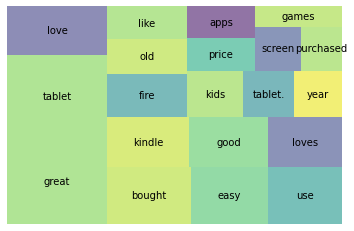

In [41]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

추가적으로 킨들의 리뷰와 전체 리뷰의 토큰을 비교해 보겠습니다.

In [42]:
df['kindle'] = df['name'].str.contains('kindle', case=False)

In [43]:
wc_kindle = word_count(df[df['kindle'] == 1]['tokens'])
wc.shape, wc_kindle.shape

((9344, 7), (2053, 7))

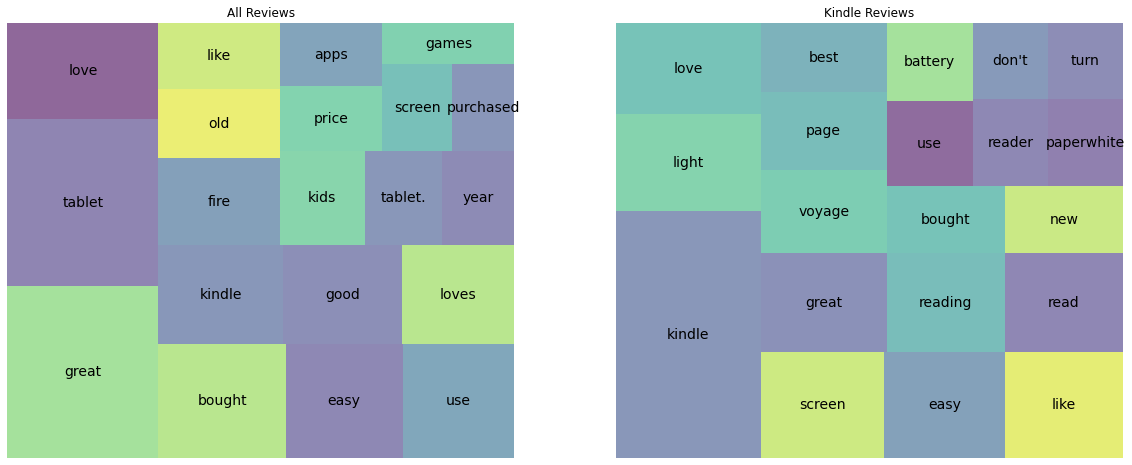

In [44]:
wc_top20 = wc[wc['rank'] <= 20]
wc_kindle_top20 = wc_kindle[wc_kindle['rank'] <= 20]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6, ax=axes[0], text_kwargs={'fontsize':14})
axes[0].axis('off')

axes[1].set_title('Kindle Reviews')
squarify.plot(sizes=wc_kindle_top20['percent'], label=wc_kindle_top20['word'], alpha=0.6, ax=axes[1], text_kwargs={'fontsize':14})
axes[1].axis('off')

plt.show()

### 통계적 트리밍(Trimming)

기존에 알려진 불용어를 제거하는 대신 코퍼스에서 통계적인 방법을 통해 단어를 제거하는 방법이 있습니다.

단어들의 누적분포 그래프를 다시 보겠습니다.

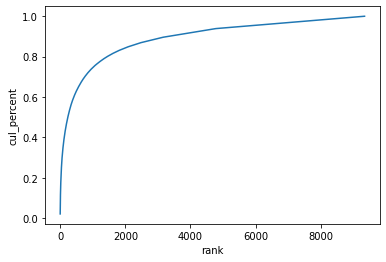

In [45]:
sns.lineplot(x='rank', y='cul_percent', data=wc);

이 그래프에서 알 수 있는 것은 몇몇 소수의 단어들이 전체 코퍼스의 80%를 차지한다는 것입니다. 이런 현상은 다음과 같이 두 가지로 해석할 수 있습니다.

1. 자주 나타나는 단어들(그래프의 왼쪽)은 여러 문서에 두루 나타나기 때문에 문서의 의미를 이해하는데 통찰력을 제공하지 않습니다.
2. 자주 나타나지 않는 단어들(그래프의 오른쪽)도 역시 너무 드믈게 나타나기 때문에 큰 의미가 없을 확률이 높습니다.

랭크가 높거나 낮은 단어들을 한 번 살펴 보고 제거해 봅시다:

In [46]:
wc.tail(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
9324,ink,1,1,9325.0,0.000013,0.999746,0.000193
9322,compare.,1,1,9326.0,0.000013,0.999759,0.000193
9327,multifaceted,1,1,9327.0,0.000013,0.999772,0.000193
9326,opportunities,1,1,9328.0,0.000013,0.999786,0.000193
9328,daily!,1,1,9329.0,0.000013,0.999799,0.000193
9329,functionalities,1,1,9330.0,0.000013,0.999813,0.000193
9330,good..,1,1,9331.0,0.000013,0.999826,0.000193
9331,geeks,1,1,9332.0,0.000013,0.999839,0.000193
9333,monday,1,1,9333.0,0.000013,0.999853,0.000193
9332,april,1,1,9334.0,0.000013,0.999866,0.000193


In [47]:
wc['word_in_docs_percent'].describe()

count    9344.000000
mean        0.001458
std         0.006942
min         0.000193
25%         0.000193
50%         0.000386
75%         0.000772
max         0.264082
Name: word_in_docs_percent, dtype: float64

In [48]:
wc['word_in_docs_percent']

59      0.264082
61      0.248650
60      0.157986
152     0.161265
101     0.147569
          ...   
9339    0.000193
9340    0.000193
9341    0.000193
9342    0.000193
9343    0.000193
Name: word_in_docs_percent, Length: 9344, dtype: float64

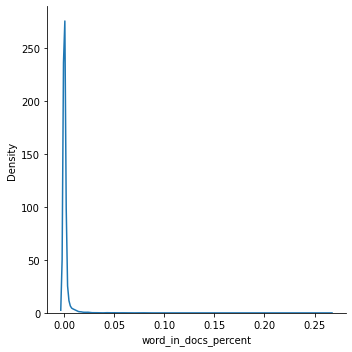

In [49]:
# 문서에 나타나는 빈도
sns.displot(wc['word_in_docs_percent'],kind='kde');

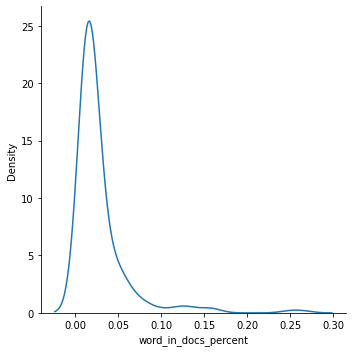

In [50]:
# 최소한 1% 이상 문서에 나타나는 단어들만 선택합니다.

wc = wc[wc['word_in_docs_percent'] >= 0.01]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [51]:
wc.shape

(232, 7)

In [52]:
wc

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
59,great,1369,1589,1.0,0.021278,0.021278,0.264082
61,tablet,1289,1543,2.0,0.020662,0.041940,0.248650
60,love,819,894,3.0,0.011971,0.053911,0.157986
152,bought,836,885,4.0,0.011851,0.065762,0.161265
101,easy,765,811,5.0,0.010860,0.076622,0.147569
...,...,...,...,...,...,...,...
1401,add,54,55,233.0,0.000736,0.498487,0.010417
4,cheap,52,54,234.0,0.000723,0.499210,0.010031
586,old.,54,54,238.0,0.000723,0.502102,0.010417
1412,check,53,54,240.0,0.000723,0.503549,0.010224


## 표제어추출(lemmatization)과 어간추출(stemming) 하기

토큰화된 단어들을 보면, 조금 더 수정이 필요한 부분이 보입니다. 예를 들어 'batteries' 와 'battery'를 보면 이 둘은 어근(root)이 같은 단어입니다.
이런 단어들을 표제어추출(lemmatization) 이나 어간추출(stemming)을 통해 추출 하게 됩니다.

### Stemming(어간추출)

- [PorterStemmer](https://tartarus.org/martin/PorterStemmer/)

> 어간(stem): 단어의 의미가 포함된 부분으로 접사등이 제거된 형태 입니다. 어근이나 단어의 원형과 같지 않을 수 있습니다.
> 예를 들어 argue, argued, arguing, argus의 어간은 단어들의 뒷 부분이 제거된 argu가 어간입니다.

다음과 같은 부분을 제거합니다:
- 'ing'
- 'ed'
- 's'

Stemming 방법은 Porter, Snowball, Dawson 등 알고리즘으로 잘 정립되어 있습니다. 이 알고리즘들에 대한 더 자세한 정보는 다음을 참고하세요. 
- [A Comparative Study of Stemming Algorithms](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy는 Stemming을 제공하지 않고 **lemmatization**만 제공하기 때문에, `nltk` 를 사용해 stemming을 진행해 보겠습니다.

In [53]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]

for word in words:
    print(ps.stem(word))

wolf
wolv


### 아마존 리뷰데이터를 Stemming 해 봅시다.

In [54]:
tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

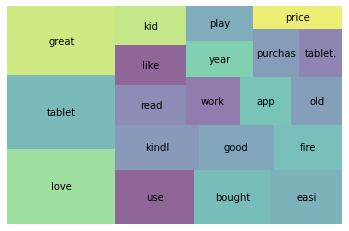

In [55]:
wc = word_count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()